### Linear Regression Model

In [2]:
#Import Libraries 
library(dplyr)
library(ggplot2)

### Generating own data for linear model
#### Column 'type' contains 3 types : Homoscedastic, Heteroscedastic and Quadratic


In [3]:
a= 5 #Intercept
b= 0.2 #Slope
x= runif(30, min=0.10, max = 50) #runif - random deviates of uniform distribution
y= a + b*x + rnorm(30, sd= 2) #rnorm - vector of random numbers with a normal distribution added as Noise
df = data.frame(x=x, y=y, type = "homoscedastic")
print(tail(df))

           x         y          type
25 36.313046  9.431202 homoscedastic
26 30.426396 10.592218 homoscedastic
27  3.945953  5.322647 homoscedastic
28  7.386572  7.009166 homoscedastic
29 45.576978 16.872790 homoscedastic
30 16.950313  7.192772 homoscedastic


In [4]:
y = a + b*x + rnorm(30, sd=0.05) * (x+15)
df = rbind(df, data.frame(x=x,y=y, type = "heteroscedastic"))
print(tail(df))

           x         y            type
55 36.313046  7.928085 heteroscedastic
56 30.426396 10.978073 heteroscedastic
57  3.945953  7.015537 heteroscedastic
58  7.386572  5.358505 heteroscedastic
59 45.576978 15.596946 heteroscedastic
60 16.950313 12.402777 heteroscedastic


In [5]:
y = x^2/40+ a + rnorm(30, sd=2)
df = rbind(df, data.frame(x=x,y=y, type = "quadratic"))
print(tail(df))

           x         y      type
85 36.313046 39.376551 quadratic
86 30.426396 26.993119 quadratic
87  3.945953  4.044728 quadratic
88  7.386572  5.061358 quadratic
89 45.576978 56.751467 quadratic
90 16.950313 11.230393 quadratic


#### Create linear regression model for the data formed and analysing the summary function values

In [6]:
print("----------------------------Type - homoscedastic-----------------------------------------")
reg <- lm(data=df[df$type=="homoscedastic",],y~x)
summary(reg)


print("----------------------------Type - heteroscedastic-----------------------------------------")
reg <- lm(data=df[df$type=="heteroscedastic",],y~x)
summary(reg)


print("----------------------------Type - quadratic-----------------------------------------")
reg <- lm(data=df[df$type=="quadratic",],y~x)
summary(reg)
print("---------------------------------------------------------------------")

[1] "----------------------------Type - homoscedastic-----------------------------------------"



Call:
lm(formula = y ~ x, data = df[df$type == "homoscedastic", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5286 -1.3398  0.0513  1.1199  4.0981 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.2110     0.7754   8.010 1.01e-08 ***
x             0.1852     0.0266   6.961 1.44e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.883 on 28 degrees of freedom
Multiple R-squared:  0.6338,	Adjusted R-squared:  0.6207 
F-statistic: 48.46 on 1 and 28 DF,  p-value: 1.438e-07


[1] "----------------------------Type - heteroscedastic-----------------------------------------"



Call:
lm(formula = y ~ x, data = df[df$type == "heteroscedastic", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2150 -1.3159 -0.1096  1.3010  6.2080 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.92217    1.00534   4.896 3.69e-05 ***
x            0.19885    0.03449   5.765 3.45e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.441 on 28 degrees of freedom
Multiple R-squared:  0.5428,	Adjusted R-squared:  0.5265 
F-statistic: 33.24 on 1 and 28 DF,  p-value: 3.446e-06


[1] "----------------------------Type - quadratic-----------------------------------------"



Call:
lm(formula = y ~ x, data = df[df$type == "quadratic", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7135 -2.8005  0.0845  1.8967  6.6340 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.27562    1.52801  -3.453  0.00178 ** 
x            1.21537    0.05242  23.185  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.71 on 28 degrees of freedom
Multiple R-squared:  0.9505,	Adjusted R-squared:  0.9487 
F-statistic: 537.5 on 1 and 28 DF,  p-value: < 2.2e-16


[1] "---------------------------------------------------------------------"


### Type - homoscedastic 
The residuals summary shows that the model accurately predicts the dependent variable (median near to zero). However, performance varies, with some situations showing that the model overestimates and underestimates. The intercept and coefficient of x are both statistically significant, as shown by small p-values . 
In this case, with a standard deviation of 2 in the random noise, an RSE of 1.964 indicates that the model captures a large portion of the data variability, and the residuals are tiny in comparison to the overall variability. This is a good fit, given the scale of the random noise in data.
The model explains approximately 66.34% of the variance in the dependent variable. The adjusted R-squared of 0.6514, which is somewhat lower than R², suggests that adding more predictors may not considerably improve the model.
The strong F-statistic and the very low p-value indicate that the regression model is statistically significant and gives a better fit than a model without predictorrs.
It appears to be a good model.


### Type - heteroscedastic
The median is 0.0829, indicating that the model is reasonably accurate in predicting the dependent variable. The distribution varies, with some residuals negative (model overestimates) and others positive (model underestimates).
The intercept is 5.72003, while the coefficient for x is 0.14059.
Both coefficients are statistically significant, as shown by their extremely low p-values (***).
The F-statistic is 39.8, with an extremely low p-value (8.004e-07), shows that the whole model is statistically significant and fits better than a model without predictors.
RSE is reasonably minimal, which means that the average magnitude of the residuals is not very large.
The multiple R-squared value is 0.587, suggesting that the model accounts for 58.7% of the variation in the dependent variable. The R-squared values suggest a modest level of explanation. The model looks to be a good fit for the data, explaining a significant percentage of the variance in the dependent variable.


### Type - quadratic
The median result of -0.9434 indicates that the model's predictions are close to accurate.  Both the intercept and the quadratic term show statistical significance.
The Multiple R-squared value of 0.9299 indicates that the model explains a significant percentage of the variance in the dependent variable.
The RSE (residual standard deviation) is 5.363. The relatively big RSE shows greater variability in the predictions. The F-statistic is 371.2, with a low p-value (<2.2e-16).
This means that the whole model is highly statistically significant (Strong) and fits better than a model without predictors.
In conclusion, the quadratic model appears to be statistically significant and accounts for a major percentage of the variance in the dependent variable. The coefficients are significant, and the residuals exhibit some variation around the fitted values.

#### plot(reg) - Diagnostic plot : 
#### 1. Scatterplot of residuals against fitted values (residuals vs. fitted).
#### 2. Normal Q-Q plot of residuals.
#### 3. Scale-location plot (square root of standardized residuals against fitted values).
#### 4. Residuals vs. leverage plot.

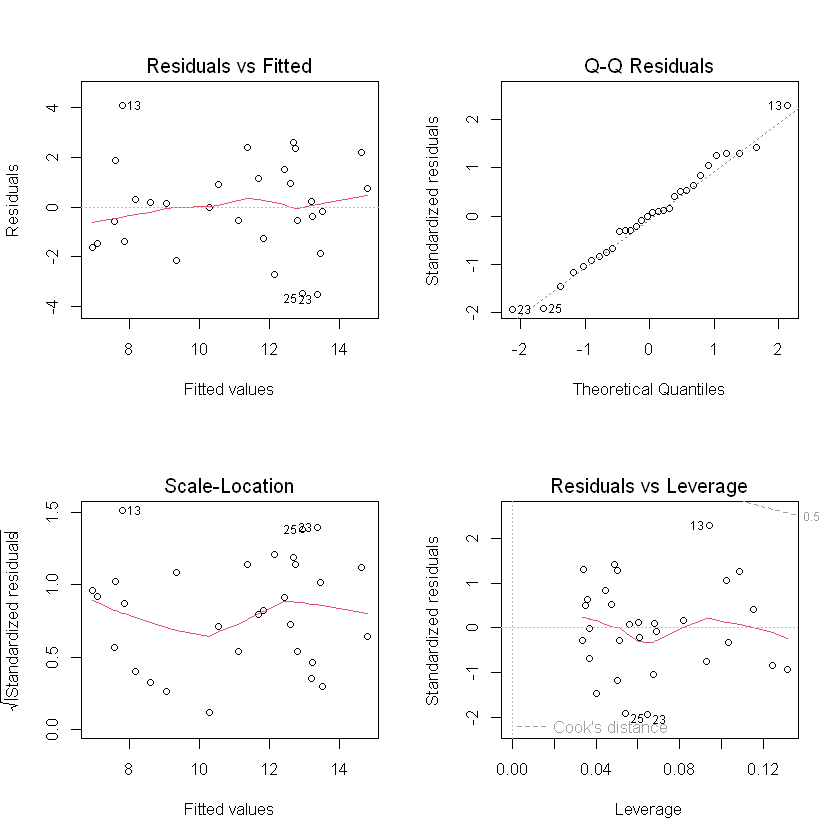

In [7]:
reg <- lm(data=df[df$type=="homoscedastic",],y~x)
par(mfrow=c(2,2)); 
plot(reg); 

#### Type - homoscedastic
1) Scatterplot of Residuals against Fitted Values (Residuals vs. Fitted): A random scatter of points without ane patter , model is making unbiased predictions across the range of fitted values.
2) Normal Q-Q Plot of Residual: Points follow a roughly straight , residuals are approximately normally distributed.
3) Scale-Location Plot (Square Root of Standardized Residuals against FittedValuee): Equally spread points indicating homoscedasticity (constant variance).
4) Residuals vs Leverage Outcome: A random scatter of points without any concentration in the top-right. No potential influencers seen.

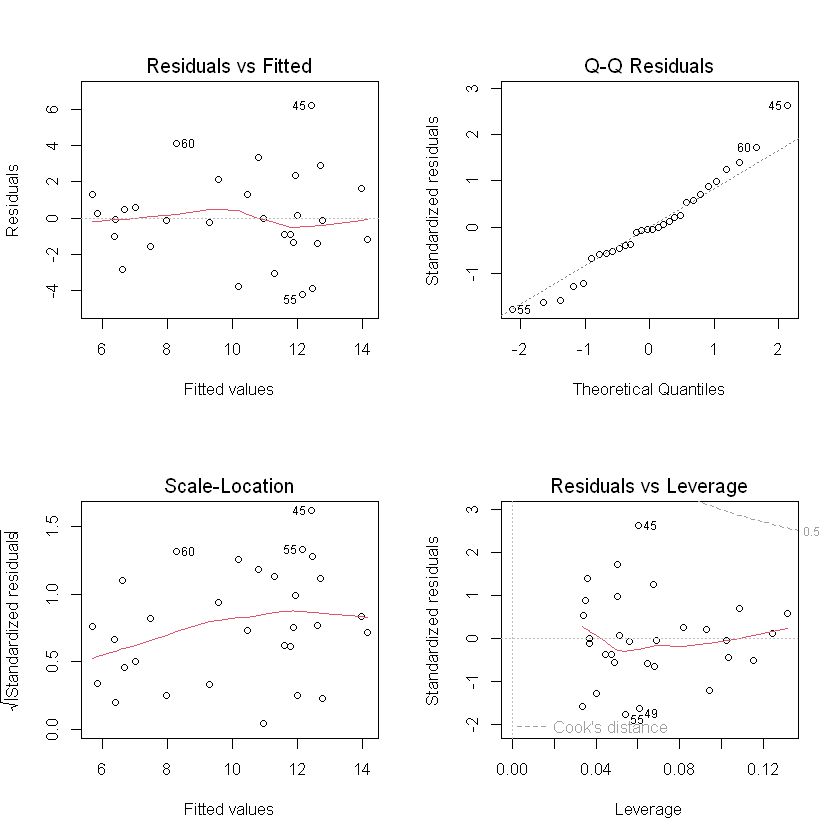

In [8]:
reg <- lm(data=df[df$type=="heteroscedastic",],y~x)
par(mfrow=c(2,2)); 
plot(reg); 

#### Type - heteroscedastic
1) Scatterplot of Residuals against Fitted Values (Residuals vs. Fitted): A random scatter of points without ane patter , model is making unbiased predictions across the range of fitted values.
2) Normal Q-Q Plot of Residual: Points follow a roughly straight , residuals are approximately normally distributed similar to that of homoscedastic type
3) Scale-Location Plot (Square Root of Standardized Residuals against Fitted Value): Equally spread points indicating homoscedasticity (constant variance)
4) Residuals vs. Leverage Outcome: No potential influencers observered but the concentration of points around the middle might represent a cluster of typical or common cases in your dataset. 
These observations neither have extreme predictor values nor large discrepancies between observed and predicted values.


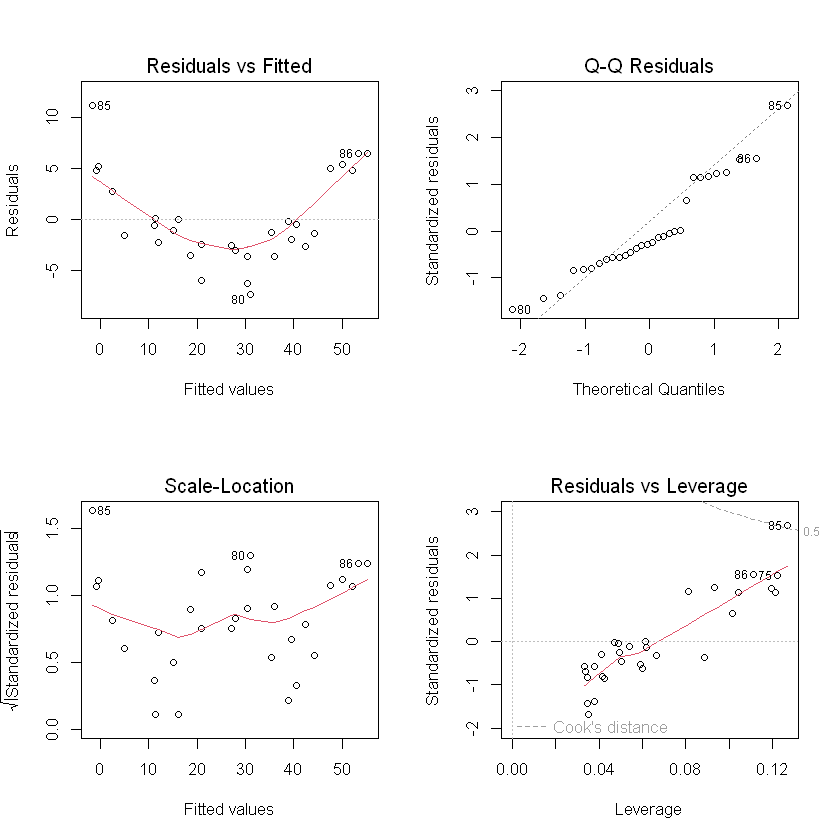

In [10]:
reg <- lm(data=df[df$type=="quadratic",],y~x)
par(mfrow=c(2,2)); 
plot(reg); 

#### Type - quadratic
1) Scatterplot of Residuals against Fitted Values (Residuals vs. Fitted): A random scatter of points without ane patter , model is making unbiased predictions across the range of fitted values.
2) Normal Q-Q Plot of Residual: Points follow a roughly straight but most deviate from the straight line. It suggests departures from normality, such as skewness or heavy tails.
3) Scale-Location Plot (Square Root of Standardized Residuals against Fitted Value): Equally spread points indicating homoscedasticity (constant variance)
4) Residuals vs. Leverage Outcome: A random scatter of points with some concentration. Points concentrated at the bottom and top corners of the horizontal line in the plot suggest the presence of influential observations. 
These are data points that have a substantial impact on the estimation of the regression coefficients.

#### Polynomial regression with the quadratic data and Prediction of Y values using the Quadratic Model
 The geom_point function adds blue points for each data point, and geom_line adds a red line based on the predicted values (yv) from the quadratic regression model.


Call:
lm(formula = y ~ x + x2, data = df[df$type == "quadratic", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9206 -1.1185 -0.0011  1.0846  3.2169 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.945224   0.854554   3.447  0.00187 ** 
x           0.103572   0.083261   1.244  0.22421    
x2          0.023814   0.001632  14.589 2.51e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.913 on 27 degrees of freedom
Multiple R-squared:  0.9928,	Adjusted R-squared:  0.9922 
F-statistic:  1850 on 2 and 27 DF,  p-value: < 2.2e-16


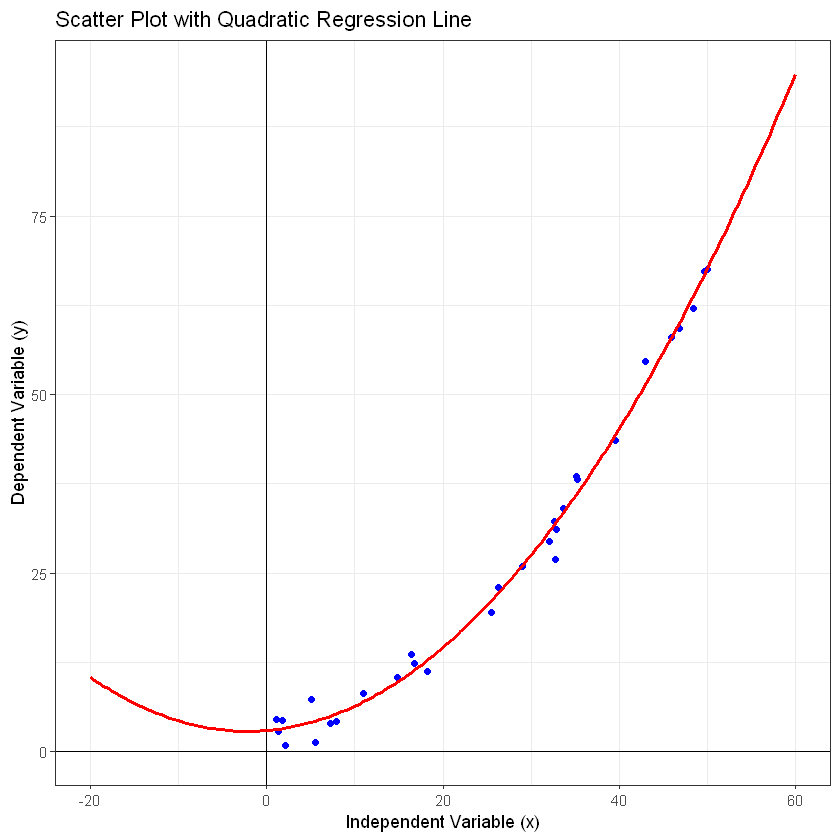

In [77]:
df$x2=df$x^2
reg_quad <- lm(data=df[df$type=="quadratic",],y~x+x2)
summary(reg_quad)
xv <- seq(-20,60,.5)
# Prediction of Y values using the Quadratic Model
yv <- predict(reg_quad, list(x=xv,x2=xv^2))

# Scatter Plot with Quadratic Regression Line
ggplot(data=df[df$type=="quadratic",]) + theme_bw() +
      geom_hline(yintercept=0) + geom_vline(xintercept=0) +
      geom_point(aes(x=x,y=y),color="blue") +
      geom_line(data=data.frame(x=xv,y=yv),aes(x=x,y=y),color="red",size=1)  +  
      labs(title = "Scatter Plot with Quadratic Regression Line",
      x = "Independent Variable (x)",
      y = "Dependent Variable (y)") 

#### Polynomial regression with the quadratic data
The quadratic regression model fits the data well, as seen by a high R squared and a strong F statistic.
The intercept differs significantly from zero, indicating a non-zero baseline. The intercept of 2.9452 differs considerably from zero (based on the low p-value of 0.00187). This implies that even if both x and x square are zero, the predicted value of y is not zero. There is a nonzero baseline or beginning point for y, and the difference is statistically significant. It implies that the model contains a constant component that provides a non-zero baseline for predictions, which is supported by the data according to the statistical test (p-value).
The coefficient for x squared is quite substantial, showing a strong quadratic relationship.The coefficient for x is not statistically significant since p-value 0.22 (expected level is 0.05), indicating that the linear component is not supported by the dat

#### Scater Plot with quadratic regression line

The upward curve in the scatterplot indicates a positive quadratic relationship between the variables. As the predictor variable increases, the response variable first accelerates before slowing. Here, it seems to be a good fit..
